In [3]:
#Importing libraries
import numpy as np 
import pandas as pd
from math import * 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [104]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [4]:
df=pd.read_csv("Telecom_customer_churn.csv")

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Data statistics

df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3410-YOQBQ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [11]:
# To check for Missing values

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
#No missing value

In [22]:
#However fro the dataset above we can see a few Nan values lets drop the Nan values

In [23]:
df=df.dropna()

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#Nan values have been removed

In [26]:
#View the unique data in each column

In [27]:

for item in df.columns:
    print(item)
    print (df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [28]:
#Dropping the ID column since it will not impact churn 

In [30]:
df = df.drop("customerID", axis=1)

In [31]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [32]:
#To check for Numerical and categorical 

In [33]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [34]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
#To understand the skewed data

In [37]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [38]:
df.kurt()

SeniorCitizen     1.362596
tenure           -1.387372
MonthlyCharges   -1.257260
dtype: float64

In [39]:
#Now lets do some visualizations 

In [40]:
#Lets explore the target variable to understand the percentage of churners

In [41]:
df.groupby('Churn').size()/len(df)

Churn
No     0.73463
Yes    0.26537
dtype: float64

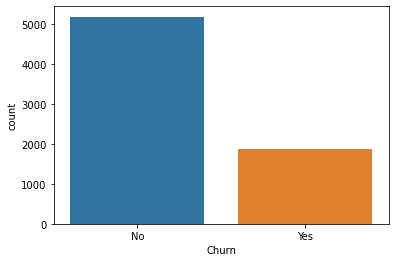

In [43]:
sns.countplot(x='Churn', data=df)

In [45]:
#Univariate analysis for all categorical columns

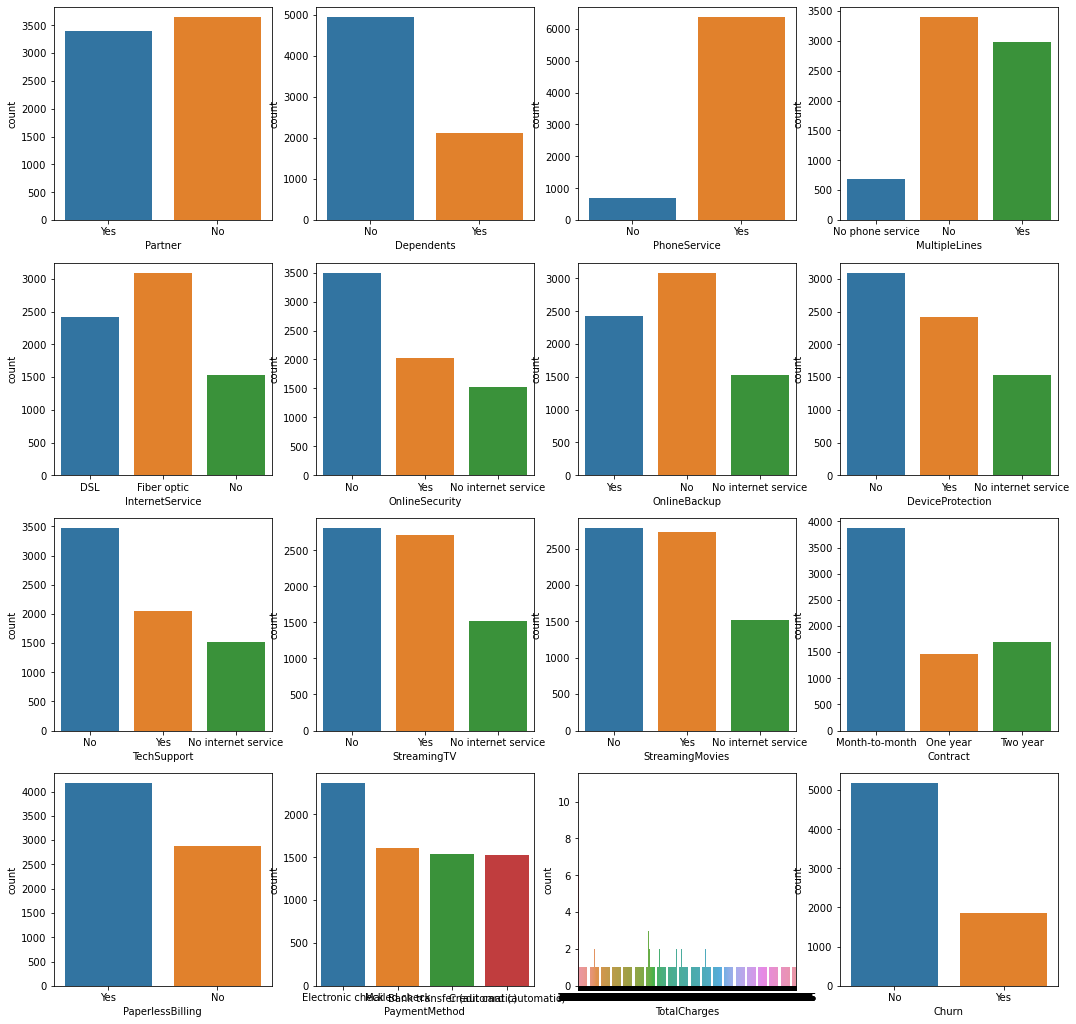

In [46]:
plt.figure(figsize=(18, 18))

for k in range(1, len(categorical_features.columns)):
    plt.subplot(4, 4, k)
    sns.countplot(x=categorical_features.columns[k], data=df)

In [47]:
#Bivariate analysis . lets visualize and see how it differs with churn 

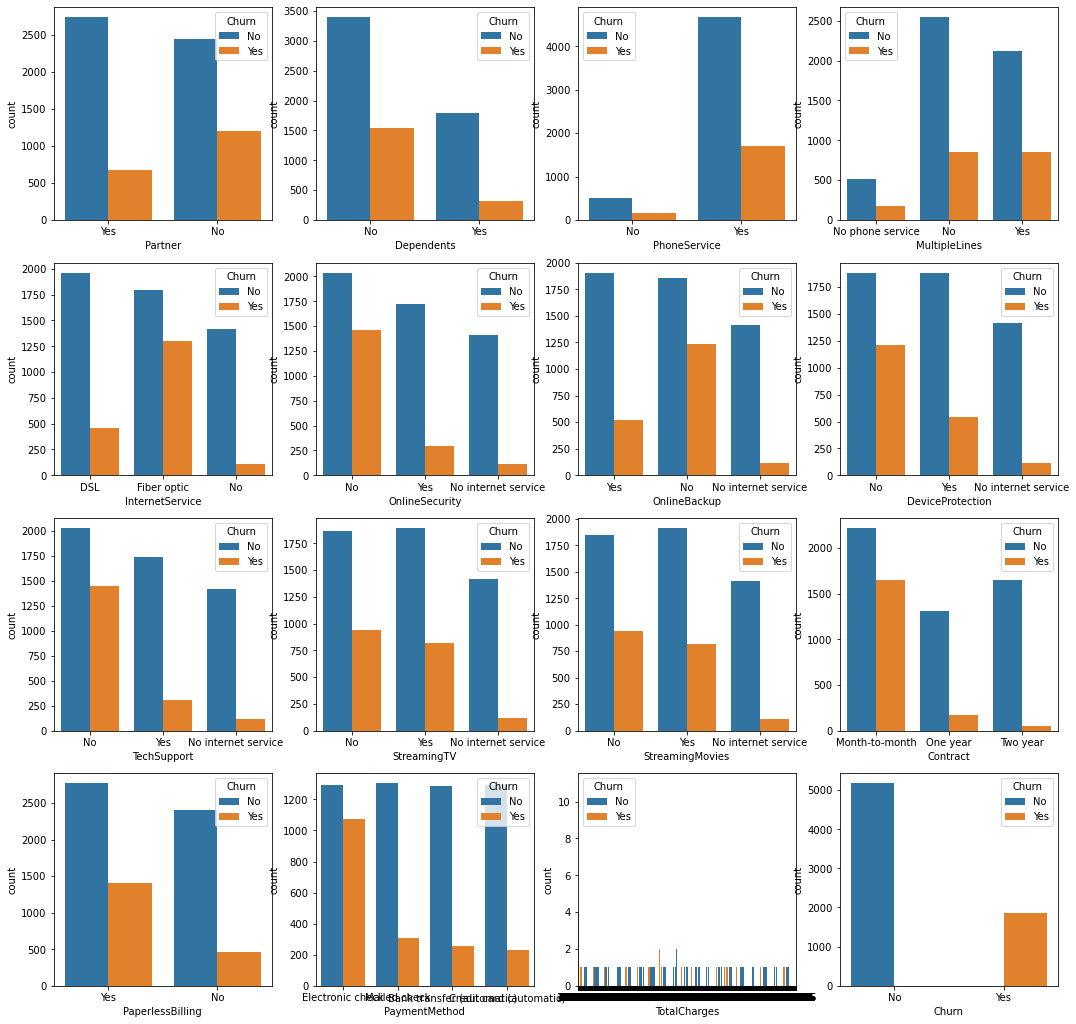

In [48]:
plt.figure(figsize=(18, 18))

for k in range(1, len(categorical_features.columns)):
    plt.subplot(4, 4, k)
    sns.countplot(x=categorical_features.columns[k], data=df, hue='Churn')

In [49]:
#Observations

->Among those who have optical fiber, there are many who churn, those who have no technical support, no device protection probably due to a lack of quality.
->Those who have a month-to-month contract are more likely to churn
->Those who have no streaming movies are likely to churn


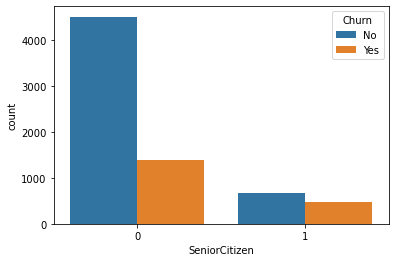

In [50]:
sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.show()

In [51]:
#Lets try to understand some of these features that we saw above in details

In [52]:
df.drop(columns='SeniorCitizen').groupby('InternetService').describe()

tenure                                                     \
                  count       mean        std  min  25%   50%    75%   max   
InternetService                                                              
DSL              2421.0  32.821561  24.812178  0.0  9.0  29.0  56.00  72.0   
Fiber optic      3096.0  32.917959  24.425332  1.0  9.0  30.0  56.00  72.0   
No               1526.0  30.547182  24.356507  0.0  8.0  25.0  52.75  72.0   

                MonthlyCharges                                              \
                         count       mean        std    min    25%     50%   
InternetService                                                              
DSL                     2421.0  58.102169  16.259522  23.45  46.20  56.150   
Fiber optic             3096.0  91.500129  12.663039  67.75  80.55  91.675   
No                      1526.0  21.079194   2.164221  18.25  19.70  20.150   

                                 
                    75%     max  
InternetService                  
DSL               69.90   94.80  
Fiber optic      101.15  118.75  
No                20.90   26.90

In [53]:
#We have seen previously that there is a very high churn rate for those who have a fiber optic service, but we can observe in these statistics that they are also those who bring the most money to the company on average. They are definitely customers that must be kept

In [54]:
df.drop(columns='SeniorCitizen').groupby('Partner').describe()

tenure                                                     \
          count       mean        std  min   25%   50%   75%   max   
Partner                                                              
No       3641.0  23.357869  21.769526  0.0   4.0  16.0  39.0  72.0   
Yes      3402.0  42.017637  23.698742  0.0  21.0  46.0  65.0  72.0   

        MonthlyCharges                                                      \
                 count       mean        std    min      25%    50%    75%   
Partner                                                                      
No              3641.0  61.945001  29.060087  18.25  34.0500  68.65  85.40   
Yes             3402.0  67.776264  30.875503  18.40  39.3625  74.80  94.05   

                 
            max  
Partner          
No       118.65  
Yes      118.75

In [55]:
df.drop(columns='SeniorCitizen').groupby('Dependents').describe()

tenure                                                     \
             count       mean        std  min   25%   50%   75%   max   
Dependents                                                              
No          4933.0  29.806000  24.259877  1.0   7.0  25.0  52.0  72.0   
Yes         2110.0  38.368246  24.213340  0.0  16.0  39.0  62.0  72.0   

           MonthlyCharges                                                     \
                    count       mean        std    min    25%     50%    75%   
Dependents                                                                     
No                 4933.0  67.002808  29.274849  18.25  44.85  73.900  90.65   
Yes                2110.0  59.522156  31.301735  18.70  24.50  60.975  85.95   

                    
               max  
Dependents          
No          118.65  
Yes         118.75

In [56]:
#Customers with partner or dependents give higher revenue and must be retained


In [57]:
df.drop(columns='SeniorCitizen').groupby('OnlineBackup').describe()

tenure                                                \
                      count       mean        std  min   25%   50%    75%   
OnlineBackup                                                                
No                   3088.0  23.680699  21.551583  0.0   4.0  17.0  39.00   
No internet service  1526.0  30.547182  24.356507  0.0   8.0  25.0  52.75   
Yes                  2429.0  44.565253  23.223725  0.0  25.0  50.0  66.00   

                          MonthlyCharges                                     \
                      max          count       mean        std    min   25%   
OnlineBackup                                                                  
No                   72.0         3088.0  71.938002  21.021906  23.45  54.6   
No internet service  72.0         1526.0  21.079194   2.164221  18.25  19.7   
Yes                  72.0         2429.0  83.081597  21.462684  28.45  66.3   

                                              
                       50%       75%     max  
OnlineBackup                                  
No                   74.75   88.8125  112.95  
No internet service  20.15   20.9000   26.90  
Yes                  85.80  100.7000  118.75

In [58]:
#Person with online backup yield more profit to the company and more likely to use hence shoul dbe retained

In [59]:
df.drop(columns='SeniorCitizen').groupby('Contract').describe()

tenure                                                     \
                 count       mean        std  min   25%   50%   75%   max   
Contract                                                                    
Month-to-month  3875.0  18.036645  17.689054  1.0   3.0  12.0  29.0  72.0   
One year        1473.0  42.044807  19.035883  0.0  27.0  44.0  58.0  72.0   
Two year        1695.0  56.735103  18.209363  0.0  48.0  64.0  71.0  72.0   

               MonthlyCharges                                              \
                        count       mean        std    min     25%    50%   
Contract                                                                    
Month-to-month         3875.0  66.398490  26.926599  18.75  45.850  73.25   
One year               1473.0  65.048608  31.840539  18.25  26.900  68.75   
Two year               1695.0  60.770413  34.678865  18.40  24.025  64.35   

                                
                   75%     max  
Contract                        
Month-to-month  88.875  117.45  
One year        94.800  118.60  
Two year        90.450  118.75

In [60]:
#People must be pushed for long term contract 

In [61]:
df.drop(columns='SeniorCitizen').groupby('PaymentMethod').describe()

tenure                                         \
                            count       mean        std  min   25%   50%   
PaymentMethod                                                              
Bank transfer (automatic)  1544.0  43.656736  23.197901  0.0  23.0  48.0   
Credit card (automatic)    1522.0  43.269382  23.339581  0.0  23.0  47.0   
Electronic check           2365.0  25.174630  22.382301  1.0   5.0  18.0   
Mailed check               1612.0  21.830025  21.218374  0.0   3.0  15.0   

                                      MonthlyCharges                        \
                            75%   max          count       mean        std   
PaymentMethod                                                                
Bank transfer (automatic)  66.0  72.0         1544.0  67.192649  30.555200   
Credit card (automatic)    66.0  72.0         1522.0  66.512385  30.612424   
Electronic check           43.0  72.0         2365.0  76.255814  24.053655   
Mailed check               36.0  72.0         1612.0  43.917060  26.314665   

                                                                    
                             min      25%     50%      75%     max  
PaymentMethod                                                       
Bank transfer (automatic)  18.40  41.0875  73.100  92.9625  118.75  
Credit card (automatic)    18.25  38.6625  73.025  90.8500  117.50  
Electronic check           18.85  60.1500  80.550  94.7000  118.65  
Mailed check               18.70  20.1500  34.700  64.9125  118.60

In [77]:
#We plot the correlation matrix, the darker a box is, the more features are correlated


In [80]:
plt.figure(figsize=(12, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()


<Figure size 864x720 with 0 Axes>

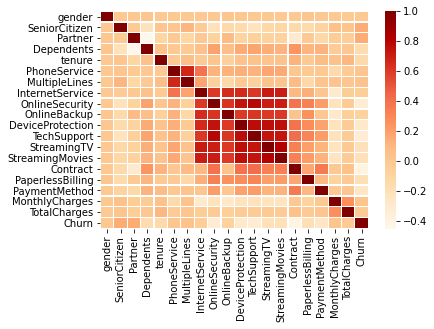

In [82]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap='OrRd')

In [83]:
#Observations from the correlation matrix

->Internet service, Online security, Online Backup, DeviceProtection, Tech Support and streamingTV,Streaming movies,contract are highly correlated features
->Total charges and customer ID are also very correlated, maybe the ID is chosen according to high-potential customers
->The most correlated to churn : Senior, Partner, Multiple lines, online backup, Monthly charges

In [84]:
#Visualise and analyse the numerical features against churn

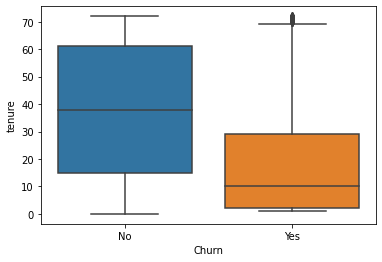

In [85]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

In [86]:
#Lesser tenure has a higher number of churn

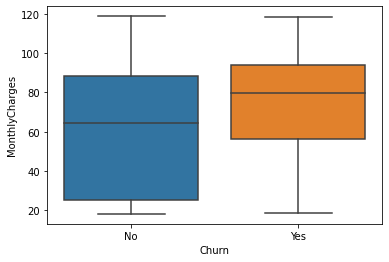

In [87]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

In [88]:
#The ones with higher monthly charges are likely to churn more

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [94]:
#To process the totalcharges column which has numerical data but is of type object

In [95]:
df=df.replace(to_replace=" ",value=np.nan)

In [96]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


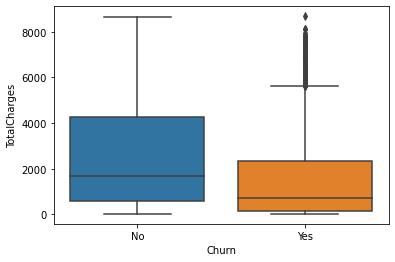

In [98]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

In [99]:
#Building Models

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [107]:
df = df.apply(LabelEncoder().fit_transform)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
#Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [112]:
#Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [113]:
#K Nearest Neighbor:

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [114]:
#Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [115]:
#Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [116]:
#Looping to find the best Model
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.85,Decision Tree
99.83,Random Forest
86.01,KNN
79.78,Logistic Regression
75.20,Naive Bayes


In [120]:
#As we can seeRandom forest and decison tree has performed the best, the decision tree  classifier goes on the first place. But first, let us check, how decision tree performs, when we use cross validation.

In [121]:
#K-fold cross validation with Random forest

In [119]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79872881 0.80084746 0.79237288 0.78601695 0.78389831 0.79449153
 0.76059322 0.76483051 0.77494692 0.7940552 ]
Mean: 0.78507817841592
Standard Deviation: 0.013310964713500758


In [122]:
#K-fold cross validation with decison tree

In [124]:
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier()
scores = cross_val_score(dtc, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.71610169 0.69279661 0.72245763 0.70127119 0.72245763 0.72881356
 0.71822034 0.73516949 0.71549894 0.71125265]
Mean: 0.7164039727949907
Standard Deviation: 0.011817319986498468


In [125]:
#After cross validation we can see random forest is performing better with score of 78% and standard deviation of .01 %

In [126]:
#Peek at Feature importance

In [127]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
TotalCharges,0.188
MonthlyCharges,0.181
tenure,0.161
Contract,0.072
PaymentMethod,0.052
OnlineSecurity,0.047
TechSupport,0.038
gender,0.028
InternetService,0.027


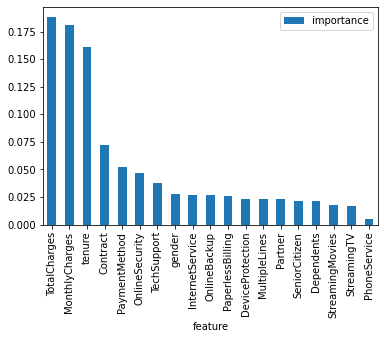

In [128]:
importances.plot.bar()

In [129]:
#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.81 %


In [130]:
#Hyperparameter Tuning

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]} from sklearn.model_selection import GridSearchCV, cross_val_score rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1) clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1) clf.fit(X_train, y_train) clf.bestparams

In [131]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 79.19 %


In [132]:
#Further evaluation
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[3157,  320],
       [ 640,  601]], dtype=int64)

In [133]:
#Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.6525515743756786
Recall: 0.48428686543110394


In [134]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.5559666975023126

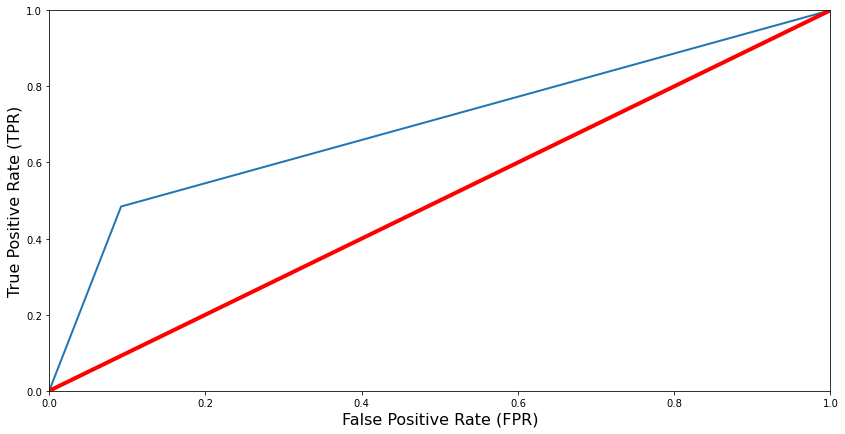

In [135]:
#ROC-AUC Curve

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predictions)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [136]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, predictions)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6961267516686724


In [137]:
#Model Saving

import pickle
filename='customerchurn.pkl'
pickle.dump(random_forest,open(filename,'wb'))

In [138]:
#Conclusion
a=np.array(y_test)
predicted=np.array(random_forest.predict(X_test))
df_com=pd.DataFrame({"Original":a,"predicted":predicted},index=range(len(a)))
df_com

,Original,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2320,0,0
2321,0,0
2322,1,1
2323,0,0
